In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Milan  = pd.read_csv('../ValoresAtipicosMilan.csv')

In [3]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Milan ['availability_365'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
23705 non-null  int64
dtypes: int64(1)
memory usage: 185.3 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan ['availability_365'].max()
Min = Milan ['availability_365'].min()
Limites = [Min, Max]
Limites

[0, 365]

In [6]:
# Calculamos el rango R
R = Max - Min
R

365

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706

ni = 1 + 3.32 * np.log10(n)
ni

15.524529489816098

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

23.511179532973

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (0, 365, 16)
intervalos

array([  0.        ,  24.33333333,  48.66666667,  73.        ,
        97.33333333, 121.66666667, 146.        , 170.33333333,
       194.66666667, 219.        , 243.33333333, 267.66666667,
       292.        , 316.33333333, 340.66666667, 365.        ])

In [10]:
# Creamos las categorías
categorias = [
    "Sin disponibilidad",          
    "Ocasionalmente disponible", 
    "Disponible algunos días",    
    "Disponible con frecuencia",  
    "Disponible moderadamente",  
    "Disponible regularmente",    
    "Disponible la mitad del año",
    "Alta disponibilidad parcial",
    "Disponibilidad frecuente",   
    "Muy disponible",             
    "Disponible la mayor parte",  
    "Casi siempre disponible",    
    "Disponible casi todo el año",
    "Disponible todo el año",    
    "Máxima disponibilidad"       
]

In [11]:
# Creamos las ctegorias en la columna numerica
Milan ['availability_365'] = pd.cut ( x = Milan  ['availability_365'], bins = intervalos, labels = categorias )
Milan ['availability_365']

0              Máxima disponibilidad
1              Máxima disponibilidad
2        Alta disponibilidad parcial
3                 Sin disponibilidad
4        Alta disponibilidad parcial
                    ...             
23700          Máxima disponibilidad
23701    Disponible casi todo el año
23702         Disponible todo el año
23703    Disponible casi todo el año
23704         Disponible todo el año
Name: availability_365, Length: 23705, dtype: category
Categories (15, object): ['Sin disponibilidad' < 'Ocasionalmente disponible' < 'Disponible algunos días' < 'Disponible con frecuencia' ... 'Casi siempre disponible' < 'Disponible casi todo el año' < 'Disponible todo el año' < 'Máxima disponibilidad']

In [12]:
table1 = freq_tbl(Milan ['availability_365'])
table1

,availability_365,frequency,percentage,cumulative_perc
0,Máxima disponibilidad,2754,0.116178,0.125051
1,Disponible con frecuencia,2235,0.094284,0.226536
2,Disponible la mitad del año,2118,0.089348,0.322708
3,Disponible la mayor parte,1643,0.069310,0.397312
4,Disponible algunos días,1619,0.068298,0.470826
5,Disponible todo el año,1548,0.065303,0.541116
6,Sin disponibilidad,1523,0.064248,0.610271
7,Casi siempre disponible,1298,0.054756,0.669209
8,Alta disponibilidad parcial,1251,0.052774,0.726014
9,Disponible regularmente,1221,0.051508,0.781456


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,availability_365,frequency
0,Máxima disponibilidad,2754
1,Disponible con frecuencia,2235
2,Disponible la mitad del año,2118
3,Disponible la mayor parte,1643
4,Disponible algunos días,1619
5,Disponible todo el año,1548
6,Sin disponibilidad,1523
7,Casi siempre disponible,1298
8,Alta disponibilidad parcial,1251
9,Disponible regularmente,1221


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('availability_365')
Filtro_index

,frequency
availability_365,
Máxima disponibilidad,2754
Disponible con frecuencia,2235
Disponible la mitad del año,2118
Disponible la mayor parte,1643
Disponible algunos días,1619
Disponible todo el año,1548
Sin disponibilidad,1523
Casi siempre disponible,1298
Alta disponibilidad parcial,1251


Text(0, 0.5, 'Frecuencia')

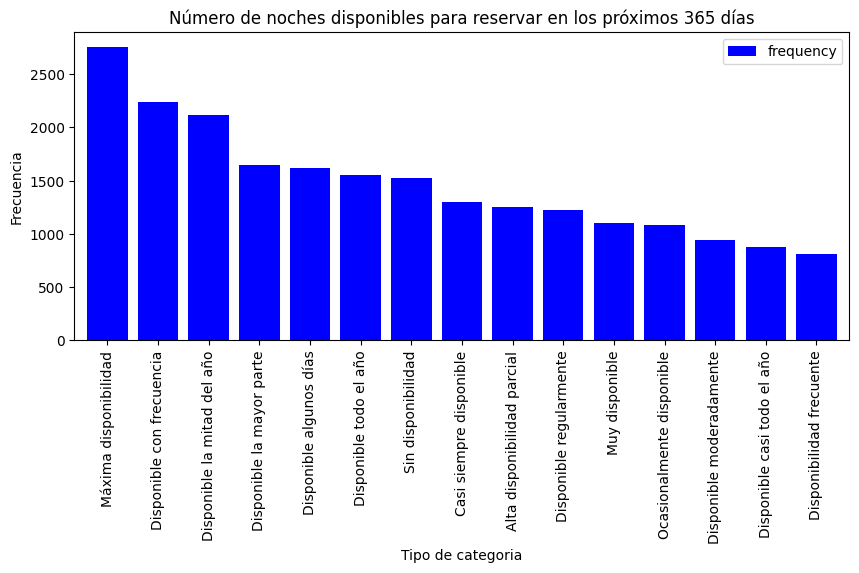

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Número de noches disponibles para reservar en los próximos 365 días')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')